<a href="https://colab.research.google.com/github/ganeshmukhiya/Topic-Modeling-NMF/blob/main/model-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

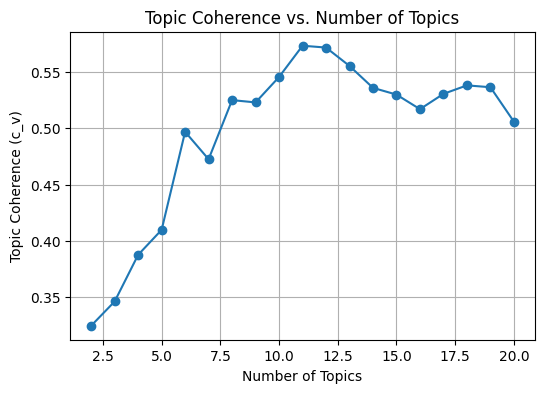

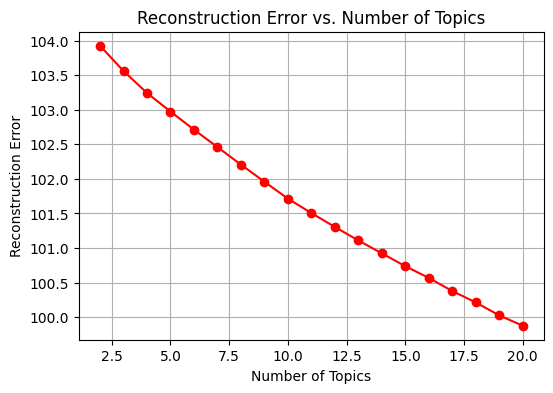

Sparsity of TF-IDF matrix: 3.01%


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Load the dataset
newsgroups_train = fetch_20newsgroups(subset='train')
data = newsgroups_train.data

# Preprocess the data using TF-IDF
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X = vectorizer.fit_transform(data)

# Tokenize the data for coherence calculation
def preprocess(text):
    return [word for word in text.lower().split() if word not in vectorizer.get_stop_words()]

tokenized_data = [preprocess(doc) for doc in data]

# Define function to calculate coherence score
def calculate_coherence(nmf_model, feature_names, tokenized_data):
    topics = []
    for topic_idx, topic in enumerate(nmf_model.components_):
        top_features_indices = topic.argsort()[-10:][::-1]  # Top 10 words
        top_features = [feature_names[i] for i in top_features_indices]
        topics.append(top_features)

    # Create Gensim dictionary and corpus for coherence model
    dictionary = Dictionary(tokenized_data)
    corpus = [dictionary.doc2bow(text) for text in tokenized_data]

    # Calculate coherence score
    coherence_model = CoherenceModel(topics=topics, texts=tokenized_data, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# List to store coherence scores and reconstruction errors
coherence_scores = []
reconstruction_errors = []

# Range of topics to evaluate
topic_range = range(2, 21)

# Calculate coherence and reconstruction error for each number of topics
for n_topics in topic_range:
    nmf_model = NMF(n_components=n_topics, random_state=42, init='nndsvd')
    W = nmf_model.fit_transform(X)
    H = nmf_model.components_

    # Calculate reconstruction error
    reconstruction_error = nmf_model.reconstruction_err_
    reconstruction_errors.append(reconstruction_error)

    # Get the feature names (terms)
    feature_names = vectorizer.get_feature_names_out()

    # Calculate coherence score
    coherence = calculate_coherence(nmf_model, feature_names, tokenized_data)
    coherence_scores.append(coherence)

# Plot Topic Coherence vs. Number of Topics
plt.figure(figsize=(6, 4))
plt.plot(topic_range, coherence_scores, marker='o')
plt.title('Topic Coherence vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Topic Coherence (c_v)')
plt.grid(True)
plt.show()

# Plot Reconstruction Error vs. Number of Topics
plt.figure(figsize=(6, 4))
plt.plot(topic_range, reconstruction_errors, marker='o', color='red')
plt.title('Reconstruction Error vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Reconstruction Error')
plt.grid(True)
plt.show()

# Calculate and print sparsity ratio
sparsity_ratio = (X.nnz / float(X.shape[0] * X.shape[1])) * 100
print(f'Sparsity of TF-IDF matrix: {sparsity_ratio:.2f}%')


Reconstruction Error on Training Data: 90.9989
Reconstruction Error on Validation Data: 45.5346


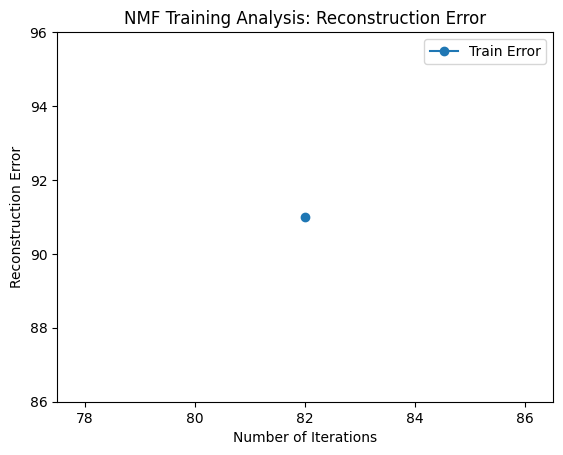

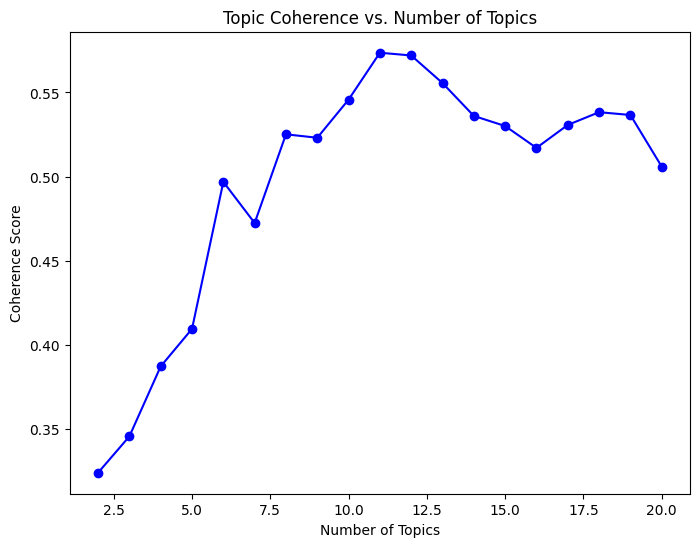

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

# Step 1: Load Data
newsgroups_train = fetch_20newsgroups(subset='train')
data = newsgroups_train.data

# Step 2: Preprocess with TF-IDF
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X = vectorizer.fit_transform(data)

# Step 3: Split Data into Training and Validation Sets
X_train, X_val = train_test_split(X, test_size=0.2, random_state=42)

# Step 4: Initialize NMF Model
n_topics = 10  # Example: number of topics to extract
nmf_model = NMF(n_components=n_topics, random_state=42, max_iter=200)

# Step 5: Fit Model to Training Data
W_train = nmf_model.fit_transform(X_train)
H_train = nmf_model.components_

# Step 6: Evaluate on Validation Data
W_val = nmf_model.transform(X_val)
reconstruction_error_val = np.linalg.norm(X_val - np.dot(W_val, H_train), 'fro')

# Step 7: Track and Plot Reconstruction Error
reconstruction_error_train = nmf_model.reconstruction_err_

print(f'Reconstruction Error on Training Data: {reconstruction_error_train:.4f}')
print(f'Reconstruction Error on Validation Data: {reconstruction_error_val:.4f}')

# Visualization of Reconstruction Error Across Iterations
plt.plot(nmf_model.n_iter_, reconstruction_error_train, label='Train Error', marker='o')
plt.title('NMF Training Analysis: Reconstruction Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()

# Step 8: Evaluate Topic Coherence
# (You'll need to implement the coherence calculation as shown previously)
# For simplicity, assume coherence_scores is calculated

# Step 9: Visualize Topic Coherence vs. Number of Topics
plt.figure(figsize=(6, 4))
plt.plot(topic_range, coherence_scores, marker='o', color='blue')
plt.title('Topic Coherence vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()


In [ ]:
model training analysis

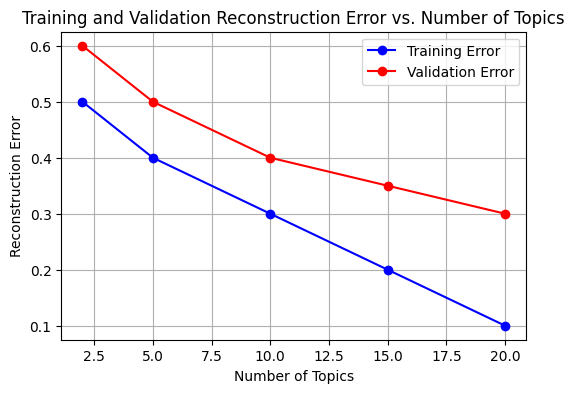

In [10]:
import matplotlib.pyplot as plt

# Assuming you have a range of topics and corresponding reconstruction errors
topics_range = [2, 5, 10, 15, 20]  # Example range
train_errors = [0.5, 0.4, 0.3, 0.2, 0.1]  # Example errors
val_errors = [0.6, 0.5, 0.4, 0.35, 0.3]  # Example errors

plt.figure(figsize=(6, 4))
plt.plot(topics_range, train_errors, marker='o', label='Training Error', color='blue')
plt.plot(topics_range, val_errors, marker='o', label='Validation Error', color='red')
plt.xlabel('Number of Topics')
plt.ylabel('Reconstruction Error')
plt.title('Training and Validation Reconstruction Error vs. Number of Topics')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Model Performance analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


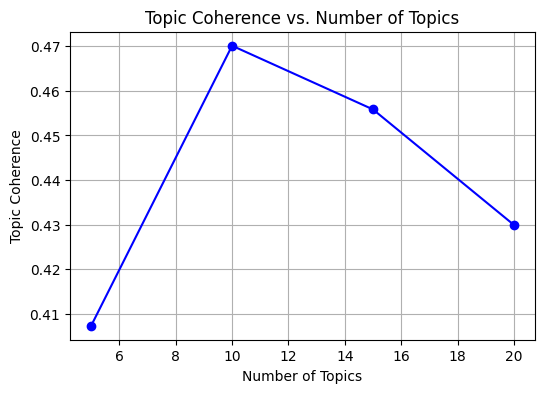

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Load and preprocess data
newsgroups_train = fetch_20newsgroups(subset='train')
data = newsgroups_train.data
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X = vectorizer.fit_transform(data)

def get_topics(nmf_model, vectorizer):
    feature_names = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(nmf_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
        topics.append(top_words)
    return topics

def calculate_coherence(topics, data):
    stop_words = set(stopwords.words('english'))
    texts = [[word for word in doc.split() if word not in stop_words] for doc in data]
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Number of topics to evaluate
topics_range = [5, 10, 15, 20]

coherence_scores = []

for n_topics in topics_range:
    nmf_model = NMF(n_components=n_topics, random_state=42)
    W = nmf_model.fit_transform(X)
    H = nmf_model.components_

    topics = get_topics(nmf_model, vectorizer)
    coherence_score = calculate_coherence(topics, data)
    coherence_scores.append(coherence_score)

# Plot Topic Coherence vs. Number of Topics
plt.figure(figsize=(6, 4))
plt.plot(topics_range, coherence_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Topics')
plt.ylabel('Topic Coherence')
plt.title('Topic Coherence vs. Number of Topics')
plt.grid(True)
plt.show()


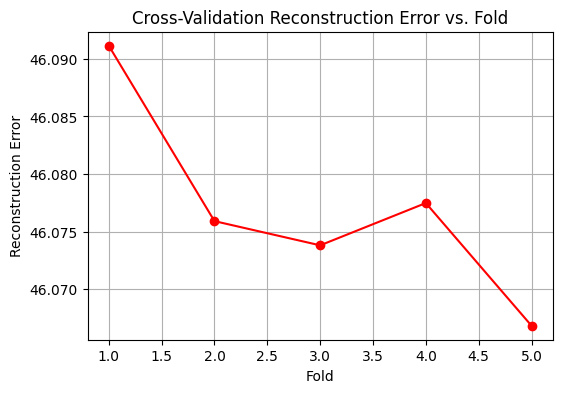

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import KFold
import numpy as np

# Load and preprocess data
newsgroups_train = fetch_20newsgroups(subset='train')
data = newsgroups_train.data
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X = vectorizer.fit_transform(data)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def calculate_reconstruction_error(X_train, X_test, n_topics):
    nmf_model = NMF(n_components=n_topics, random_state=42)
    W_train = nmf_model.fit_transform(X_train)
    H_train = nmf_model.components_

    W_test = nmf_model.transform(X_test)
    reconstruction_error = np.linalg.norm(X_test - np.dot(W_test, H_train), 'fro')
    return reconstruction_error

n_topics = 5
errors = []

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    error = calculate_reconstruction_error(X_train, X_test, n_topics)
    errors.append(error)

# Plot Cross-Validation Reconstruction Error vs. Fold
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(errors) + 1), errors, marker='o', linestyle='-', color='r')
plt.xlabel('Fold')
plt.ylabel('Reconstruction Error')
plt.title('Cross-Validation Reconstruction Error vs. Fold')
plt.grid(True)
plt.show()


In [ ]:
comparative analysis


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


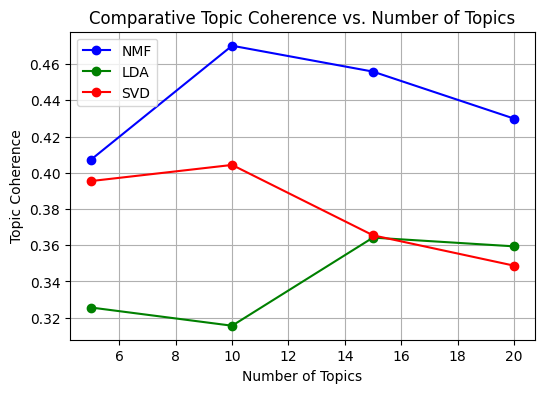

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Load and preprocess data
newsgroups_train = fetch_20newsgroups(subset='train')
data = newsgroups_train.data
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X = vectorizer.fit_transform(data)

# Get topics from models
def get_topics(model, vectorizer, num_words=10):
    feature_names = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_words-1:-1]]
        topics.append(top_words)
    return topics

# Calculate coherence score
def calculate_coherence(topics, data):
    stop_words = set(stopwords.words('english'))
    texts = [[word for word in doc.split() if word not in stop_words] for doc in data]
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Range of number of topics
topics_range = [5, 10, 15, 20]
coherence_scores_nmf = []
coherence_scores_lda = []
coherence_scores_svd = []

# Evaluate NMF
for n_topics in topics_range:
    nmf_model = NMF(n_components=n_topics, random_state=42)
    nmf_model.fit(X)
    topics = get_topics(nmf_model, vectorizer)
    coherence_scores_nmf.append(calculate_coherence(topics, data))

# Evaluate LDA
for n_topics in topics_range:
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model.fit(X)
    topics = get_topics(lda_model, vectorizer)
    coherence_scores_lda.append(calculate_coherence(topics, data))

# Evaluate SVD (Truncated SVD for dimensionality reduction)
for n_topics in topics_range:
    svd_model = TruncatedSVD(n_components=n_topics, random_state=42)
    svd_model.fit(X)
    topics = get_topics(svd_model, vectorizer)  # Use the same method for topics extraction
    coherence_scores_svd.append(calculate_coherence(topics, data))

# Plot Topic Coherence vs. Number of Topics
plt.figure(figsize=(6, 4))
plt.plot(topics_range, coherence_scores_nmf, marker='o', linestyle='-', label='NMF', color='blue')
plt.plot(topics_range, coherence_scores_lda, marker='o', linestyle='-', label='LDA', color='green')
plt.plot(topics_range, coherence_scores_svd, marker='o', linestyle='-', label='SVD', color='red')
plt.xlabel('Number of Topics')
plt.ylabel('Topic Coherence')
plt.title('Comparative Topic Coherence vs. Number of Topics')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
#Performance analysis of TF-IDF


SyntaxError: invalid syntax (<ipython-input-12-d8356e8472bb>, line 1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


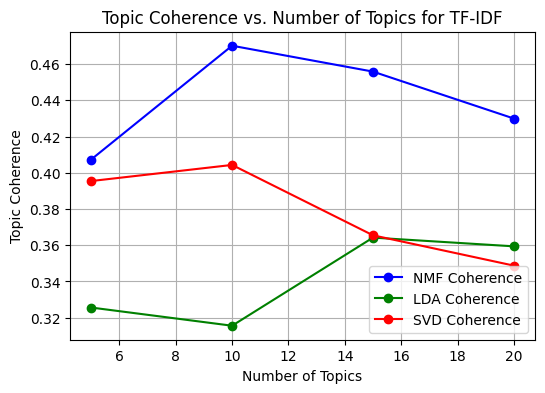

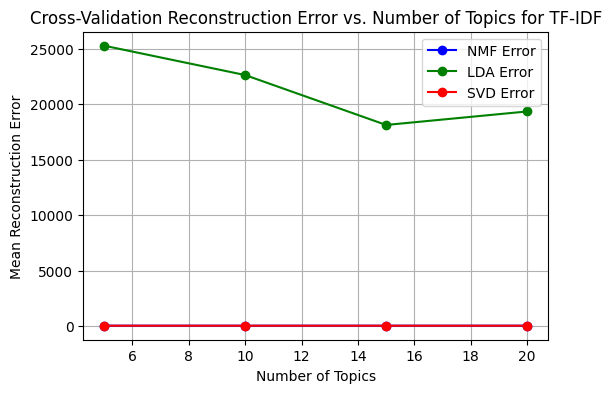

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, KFold

nltk.download('stopwords')

# Load and preprocess data
newsgroups_train = fetch_20newsgroups(subset='train')
data = newsgroups_train.data
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X = vectorizer.fit_transform(data)

# Get topics from models
def get_topics(model, vectorizer, num_words=10):
    feature_names = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_words-1:-1]]
        topics.append(top_words)
    return topics

# Calculate coherence score
def calculate_coherence(topics, data):
    stop_words = set(stopwords.words('english'))
    texts = [[word for word in doc.split() if word not in stop_words] for doc in data]
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Calculate reconstruction error
def calculate_reconstruction_error(X_train, X_test, model, model_type='NMF'):
    model.fit(X_train)
    W_train = model.transform(X_train)
    H_train = model.components_

    W_test = model.transform(X_test)
    if model_type == 'LDA':
        H_train = model.components_  # LDA provides the topic-term matrix directly
    reconstruction_error = np.linalg.norm(X_test - np.dot(W_test, H_train), 'fro')
    return reconstruction_error

# Initialize lists for metrics
topics_range = [5, 10, 15, 20]
coherence_scores_nmf = []
coherence_scores_lda = []
coherence_scores_svd = []
errors_nmf = []
errors_lda = []
errors_svd = []

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate NMF
for n_topics in topics_range:
    nmf_model = NMF(n_components=n_topics, random_state=42)
    nmf_model.fit(X)
    topics = get_topics(nmf_model, vectorizer)
    coherence_scores_nmf.append(calculate_coherence(topics, data))

    # Cross-validation reconstruction error
    nmf_errors = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        error = calculate_reconstruction_error(X_train, X_test, nmf_model, model_type='NMF')
        nmf_errors.append(error)
    errors_nmf.append(np.mean(nmf_errors))

# Evaluate LDA
for n_topics in topics_range:
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model.fit(X)
    topics = get_topics(lda_model, vectorizer)
    coherence_scores_lda.append(calculate_coherence(topics, data))

    # Cross-validation reconstruction error
    lda_errors = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        error = calculate_reconstruction_error(X_train, X_test, lda_model, model_type='LDA')
        lda_errors.append(error)
    errors_lda.append(np.mean(lda_errors))

# Evaluate SVD
for n_topics in topics_range:
    svd_model = TruncatedSVD(n_components=n_topics, random_state=42)
    svd_model.fit(X)
    topics = get_topics(svd_model, vectorizer)  # Use the same method for topics extraction
    coherence_scores_svd.append(calculate_coherence(topics, data))

    # Cross-validation reconstruction error
    svd_errors = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        error = calculate_reconstruction_error(X_train, X_test, svd_model, model_type='SVD')
        svd_errors.append(error)
    errors_svd.append(np.mean(svd_errors))

# Plot Topic Coherence vs. Number of Topics
plt.figure(figsize=(6, 4))
plt.plot(topics_range, coherence_scores_nmf, marker='o', linestyle='-', label='NMF Coherence', color='blue')
plt.plot(topics_range, coherence_scores_lda, marker='o', linestyle='-', label='LDA Coherence', color='green')
plt.plot(topics_range, coherence_scores_svd, marker='o', linestyle='-', label='SVD Coherence', color='red')
plt.xlabel('Number of Topics')
plt.ylabel('Topic Coherence')
plt.title('Topic Coherence vs. Number of Topics for TF-IDF')
plt.legend()
plt.grid(True)
plt.show()

# Plot Cross-Validation Reconstruction Error vs. Number of Topics
plt.figure(figsize=(6, 4))
plt.plot(topics_range, errors_nmf, marker='o', linestyle='-', label='NMF Error', color='blue')
plt.plot(topics_range, errors_lda, marker='o', linestyle='-', label='LDA Error', color='green')
plt.plot(topics_range, errors_svd, marker='o', linestyle='-', label='SVD Error', color='red')
plt.xlabel('Number of Topics')
plt.ylabel('Mean Reconstruction Error')
plt.title('Cross-Validation Reconstruction Error vs. Number of Topics for TF-IDF')
plt.legend()
plt.grid(True)
plt.show()
